In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Plots import correlation_matrix 
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [379]:
path2 = 'C:/Users/abdnass/Desktop/JUPY/Jupyterr/Credit/credit_test.csv'
path1 = 'C:/Users/abdnass/Desktop/JuPy/Jupyterr/Credit/credit_train.csv'
data_train = pd.read_csv(path1)
data_test = pd.read_csv(path2)

In [380]:
data_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [381]:
data_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [382]:
print(data_train.shape)
print(data_test.shape)

(100514, 19)
(10353, 18)


In [383]:
data_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [384]:
data_train.columns = data_train.columns.str.replace(' ', '_')
data_test.columns = data_test.columns.str.replace(' ', '_')

In [385]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       100000 non-null  object 
 1   Customer_ID                   100000 non-null  object 
 2   Loan_Status                   100000 non-null  object 
 3   Current_Loan_Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit_Score                  80846 non-null   float64
 6   Annual_Income                 80846 non-null   float64
 7   Years_in_current_job          95778 non-null   object 
 8   Home_Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly_Debt                  100000 non-null  float64
 11  Years_of_Credit_History       100000 non-null  float64
 12  Months_since_last_delinquent  46859 non-null

In [386]:
data = pd.concat([data_train, data_test])
df = data.copy()
print(df.head())

                                Loan_ID                           Customer_ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan_Status  Current_Loan_Amount        Term  Credit_Score  Annual_Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years_in_current_job Home_Ownership 

In [387]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       110000 non-null  object 
 1   Customer_ID                   110000 non-null  object 
 2   Loan_Status                   100000 non-null  object 
 3   Current_Loan_Amount           110000 non-null  float64
 4   Term                          110000 non-null  object 
 5   Credit_Score                  88865 non-null   float64
 6   Annual_Income                 88865 non-null   float64
 7   Years_in_current_job          105351 non-null  object 
 8   Home_Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly_Debt                  110000 non-null  float64
 11  Years_of_Credit_History       110000 non-null  float64
 12  Months_since_last_delinquent  51553 non-null 

Data Pre-processing

In [388]:
# drop the null values in Loan_ID
df.dropna(subset = ['Loan_ID'], inplace = True)
print(df.shape)


(110000, 19)


In [389]:
print(df.isnull().sum())
print('the total :', df.isnull().sum().sum())

Loan_ID                             0
Customer_ID                         0
Loan_Status                     10000
Current_Loan_Amount                 0
Term                                0
Credit_Score                    21135
Annual_Income                   21135
Years_in_current_job             4649
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    58447
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      226
Tax_Liens                          11
dtype: int64
the total : 115605


In [390]:
df.drop_duplicates(inplace = True)

Duplicate in Loan_ID

In [391]:
df[df['Loan_ID'].duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.0,Short Term,717.0,1765290.0,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.7,NaN,16.0,1.0,446329.0,891022.0,1.0,0.0
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.0,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.0,NaN,10.0,1.0,59888.0,372746.0,1.0,0.0
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.0,Short Term,721.0,662074.0,4 years,Rent,Other,1704.87,14.9,50.0,3.0,0.0,33250.0,120340.0,0.0,0.0
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.0,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.5,70.0,7.0,0.0,286387.0,908490.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,83e97814-285e-4b0a-85d9-63a6d714c0d8,3378cc3c-d0e7-4619-a5ef-d1b050ff0d5e,NaN,66308.0,Short Term,NaN,NaN,1 year,Rent,Other,4335.23,18.5,37.0,7.0,0.0,25194.0,97240.0,0.0,0.0
9990,91e26ead-810b-44a0-892f-d623e1e444a0,1e7cbdfe-d3a9-41a4-8416-3a23b08ef27b,NaN,260128.0,Long Term,611.0,3182519.0,4 years,Home Mortgage,Debt Consolidation,79563.07,20.7,40.0,47.0,0.0,1398932.0,3673032.0,0.0,0.0
9991,0594e01c-4230-4280-8267-78cd0c46f720,0c7d45a9-ff22-489c-82c0-073d74c46fd0,NaN,352704.0,Long Term,686.0,913824.0,3 years,Rent,Debt Consolidation,9595.19,9.0,NaN,5.0,0.0,299592.0,346214.0,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,NaN,132550.0,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8.0,0.0,74309.0,329692.0,0.0,0.0


In [392]:
df[(df['Loan_ID'].duplicated()) & (df['Current_Loan_Amount'] == 99999999.0)]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
2706,6b9fdc83-4696-479c-8ab1-cc35e2233cd8,4bfbef83-43cb-4f97-83d8-b8fe05fd4a57,Fully Paid,99999999.0,Long Term,700.0,686945.0,1 year,Own Home,Debt Consolidation,3932.81,11.0,NaN,7.0,0.0,164578.0,227678.0,0.0,0.0
2857,412394d9-b450-42dc-9b2f-3956948df8b6,1dc24b5e-f322-469b-a154-a15fea750baf,Fully Paid,99999999.0,Short Term,707.0,1118948.0,10+ years,Rent,Debt Consolidation,29465.58,15.7,63.0,11.0,1.0,66994.0,129294.0,1.0,0.0
2960,dde6e377-f8ae-454c-b7a6-7e6aab1bb1b8,963fa0d0-37aa-4b6a-8842-2ee56eb30618,Fully Paid,99999999.0,Long Term,654.0,1155618.0,6 years,Rent,Debt Consolidation,23979.14,11.3,4.0,13.0,0.0,315210.0,619674.0,0.0,0.0
3050,54417e35-2e25-4aea-b83a-d52a060b1398,6201f781-d2a6-4bbf-8f5b-afa83c412559,Fully Paid,99999999.0,Short Term,715.0,930905.0,6 years,Home Mortgage,Debt Consolidation,26143.05,20.8,76.0,16.0,1.0,265772.0,575212.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,1910affb-6896-47db-8be4-accc262c7fc3,fe8b8153-34e7-4d24-b6ab-a91933e3e194,NaN,99999999.0,Short Term,720.0,1455495.0,< 1 year,Home Mortgage,Home Improvements,20255.71,15.9,NaN,6.0,0.0,34105.0,134750.0,0.0,0.0
9963,259bd6b3-99b9-4151-ad6b-2e3ccc8c6549,6094adf7-95b8-4c6e-bdd9-6ab6c7e0b171,NaN,99999999.0,Long Term,673.0,909986.0,10+ years,Home Mortgage,Debt Consolidation,16152.47,19.1,48.0,9.0,0.0,178030.0,264946.0,0.0,0.0
9972,9265fa56-48fc-4631-8871-8192a7ded692,f13f7eee-da8c-48a9-987f-4a8bbf71c7a6,NaN,99999999.0,Long Term,670.0,2427250.0,5 years,Home Mortgage,Debt Consolidation,37824.63,17.3,NaN,15.0,1.0,355338.0,469678.0,1.0,0.0
9982,e718c118-1194-4924-bfcb-5711e9a6f140,d7bd83a7-a27c-4358-b20d-a2fb3c2ae5dd,NaN,99999999.0,Long Term,716.0,1592067.0,10+ years,Own Home,Debt Consolidation,13399.94,18.1,26.0,15.0,0.0,164730.0,303732.0,0.0,0.0


In [393]:
df = df[~((df['Loan_ID'].duplicated()) & (df['Current_Loan_Amount'] == 99999999.0))]

In [394]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [395]:
df[df['Loan_ID'].duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.0,Short Term,717.0,1765290.0,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.7,NaN,16.0,1.0,446329.0,891022.0,1.0,0.0
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.0,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.0,NaN,10.0,1.0,59888.0,372746.0,1.0,0.0
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.0,Short Term,721.0,662074.0,4 years,Rent,Other,1704.87,14.9,50.0,3.0,0.0,33250.0,120340.0,0.0,0.0
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.0,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.5,70.0,7.0,0.0,286387.0,908490.0,0.0,0.0
2893,e8f5ca19-f3f7-487f-aba7-26c0b600a7a3,69f7f1af-4464-4d8b-8c41-17d15b7b5e4d,Fully Paid,756756.0,Long Term,689.0,1786836.0,10+ years,Rent,Debt Consolidation,30674.17,19.9,NaN,11.0,0.0,851789.0,1397022.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,e639de51-14ea-4401-84c5-0b7afe925c53,6e43a9fd-5c79-402a-823f-ddbc7d267333,NaN,134860.0,Short Term,NaN,NaN,6 years,Home Mortgage,Debt Consolidation,20856.49,22.3,60.0,12.0,1.0,141854.0,521422.0,1.0,0.0
9988,83e97814-285e-4b0a-85d9-63a6d714c0d8,3378cc3c-d0e7-4619-a5ef-d1b050ff0d5e,NaN,66308.0,Short Term,NaN,NaN,1 year,Rent,Other,4335.23,18.5,37.0,7.0,0.0,25194.0,97240.0,0.0,0.0
9990,91e26ead-810b-44a0-892f-d623e1e444a0,1e7cbdfe-d3a9-41a4-8416-3a23b08ef27b,NaN,260128.0,Long Term,611.0,3182519.0,4 years,Home Mortgage,Debt Consolidation,79563.07,20.7,40.0,47.0,0.0,1398932.0,3673032.0,0.0,0.0
9991,0594e01c-4230-4280-8267-78cd0c46f720,0c7d45a9-ff22-489c-82c0-073d74c46fd0,NaN,352704.0,Long Term,686.0,913824.0,3 years,Rent,Debt Consolidation,9595.19,9.0,NaN,5.0,0.0,299592.0,346214.0,0.0,0.0


In [396]:
df[df['Loan_ID'].duplicated()]['Loan_ID'].count()

9269

In [397]:
df[(df['Loan_ID'].duplicated() & df['Annual_Income'].isnull())]['Loan_ID'].count()

2578

In [398]:
df.dropna(subset = ['Annual_Income'], inplace  = True)


In [399]:
df.drop_duplicates(subset = 'Loan_ID', inplace = True)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72344 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       72344 non-null  object 
 1   Customer_ID                   72344 non-null  object 
 2   Loan_Status                   67052 non-null  object 
 3   Current_Loan_Amount           72344 non-null  float64
 4   Term                          72344 non-null  object 
 5   Credit_Score                  72344 non-null  float64
 6   Annual_Income                 72344 non-null  float64
 7   Years_in_current_job          69264 non-null  object 
 8   Home_Ownership                72344 non-null  object 
 9   Purpose                       72344 non-null  object 
 10  Monthly_Debt                  72344 non-null  float64
 11  Years_of_Credit_History       72344 non-null  float64
 12  Months_since_last_delinquent  33260 non-null  float64
 13  Nu

In [401]:
df.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                      5292
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             3080
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    39084
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      153
Tax_Liens                           5
dtype: int64

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

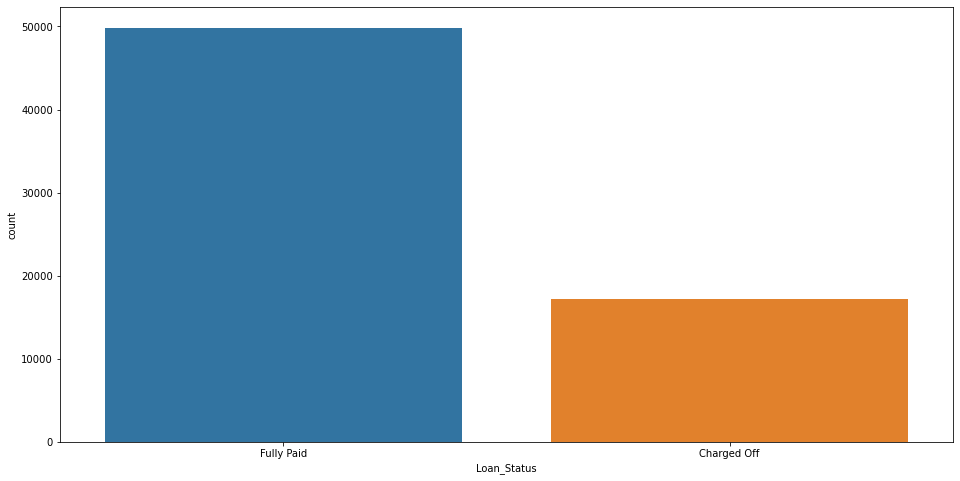

In [402]:
plt.figure(figsize = (16, 8))
sns.countplot(df['Loan_Status'])

In [403]:
df['Loan_Status'].fillna(value = 'Fully Paid', inplace = True)

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years_in_current_job', ylabel='count'>

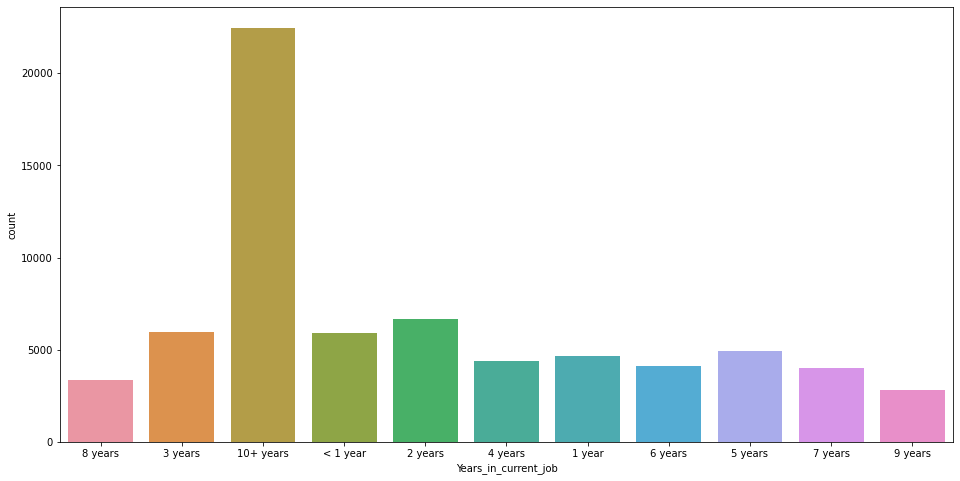

In [404]:
plt.figure(figsize = (16,8))
sns.countplot(df['Years_in_current_job'])

In [405]:
df[df['Years_in_current_job'].isnull()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
73,fd50c3d1-8d6d-410e-ba58-d3f1bcae6409,a17de546-6b7f-4abf-9af4-99047eeda08a,Fully Paid,311058.0,Long Term,675.0,1343167.0,NaN,Home Mortgage,Debt Consolidation,21378.80,31.4,17.0,11.0,0.0,247912.0,541596.0,0.0,0.0
84,37b7adb4-8f90-4ddf-813c-813e34dda68a,034ce7a6-999c-4ffa-a1d2-610f88a29606,Fully Paid,262988.0,Short Term,743.0,1340279.0,NaN,Rent,Debt Consolidation,9348.38,28.2,35.0,9.0,0.0,499548.0,681296.0,0.0,0.0
96,4cfa482a-57c2-4856-ab26-a8af32adaa3f,403bdb3c-e326-4172-9f81-4e6b992cc349,Fully Paid,158818.0,Short Term,731.0,315666.0,NaN,Own Home,Debt Consolidation,8522.83,31.3,60.0,13.0,2.0,260072.0,756646.0,0.0,2.0
169,f002c1ad-994f-41bd-88ae-e2d68cb9878d,47fdd7c4-e629-4826-a847-d2438cf2f445,Fully Paid,64966.0,Short Term,723.0,1224968.0,NaN,Home Mortgage,other,23172.21,44.0,48.0,16.0,0.0,858154.0,1344574.0,0.0,0.0
170,d92b33df-3c9d-4e44-be6d-936efa6a1784,a32475a6-e244-4386-98a7-b02c1c78e2c1,Fully Paid,300366.0,Short Term,730.0,833188.0,NaN,Home Mortgage,Debt Consolidation,13400.32,17.9,37.0,7.0,0.0,179721.0,338932.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,13cde3e3-64fb-4f70-ad8e-f20887944ca5,6a8762eb-b93c-4fb2-bf52-f9f8c1e7f2b3,Fully Paid,64746.0,Short Term,749.0,309757.0,NaN,Own Home,Home Improvements,1024.67,50.9,NaN,8.0,0.0,10051.0,252846.0,0.0,0.0
9792,039799ff-69d4-4db3-9b68-4de35c2b903f,e7d3095c-1868-4b5f-95df-41ac8ff576a4,Fully Paid,507848.0,Short Term,745.0,992009.0,NaN,Own Home,Debt Consolidation,17773.55,36.5,44.0,6.0,0.0,600875.0,1739386.0,0.0,0.0
9795,530f9c14-9491-4570-84a6-49d35b49dcc6,d402bb7c-3d77-4d89-9056-dcb18ead27ba,Fully Paid,107800.0,Short Term,740.0,284221.0,NaN,Own Home,Debt Consolidation,4523.71,25.5,15.0,10.0,0.0,140923.0,824076.0,0.0,0.0
9815,73c221d2-84e3-42b9-b743-e3cb07816440,f163ffa9-3ccf-4432-bc81-55e0c8b63712,Fully Paid,372812.0,Short Term,747.0,1196392.0,NaN,Home Mortgage,Debt Consolidation,13658.91,29.4,20.0,19.0,1.0,406638.0,1223002.0,0.0,1.0


In [406]:
df['Years_in_current_job'].fillna(value = '10+ years', inplace = True)

In [407]:
df.drop(columns = 'Months_since_last_delinquent', inplace = True)

In [408]:
df.isnull().sum()

Loan_ID                        0
Customer_ID                    0
Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            1
Bankruptcies                 153
Tax_Liens                      5
dtype: int64

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankruptcies', ylabel='count'>

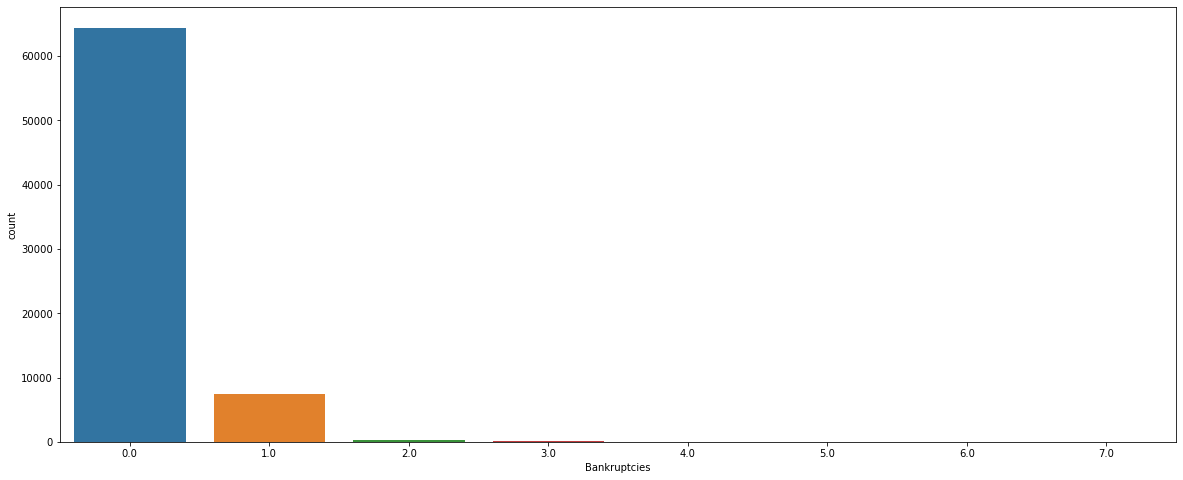

In [409]:
plt.figure(figsize = (20,8))
sns.countplot(df['Bankruptcies'])

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tax_Liens', ylabel='count'>

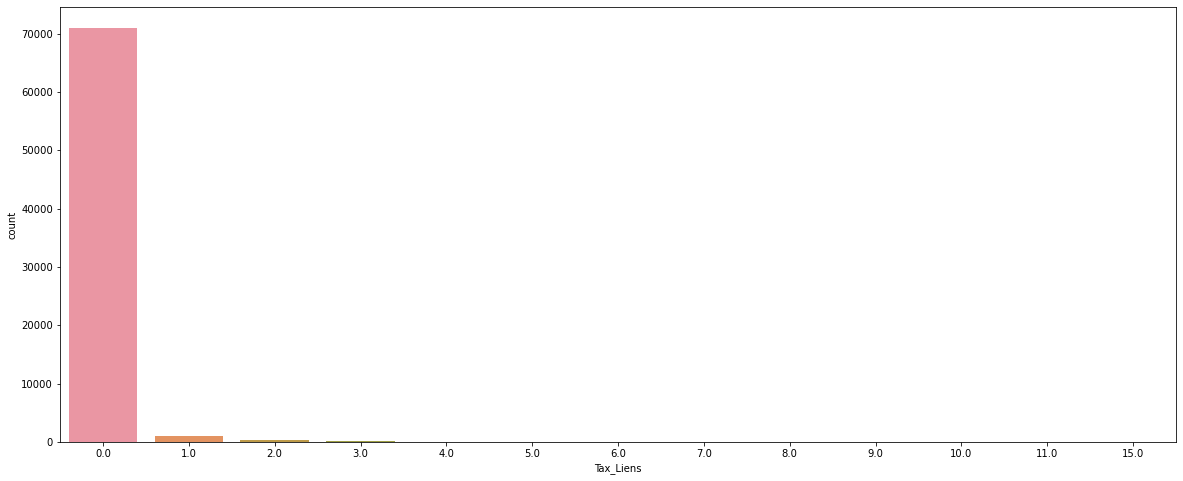

In [410]:
plt.figure(figsize = (20,8))
sns.countplot(df['Tax_Liens'])

In [411]:
df.dropna(inplace = True)

In [412]:
df.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [413]:
catego = [col for col in df.columns if df[col].dtypes == 'object']
num = df.drop(columns = catego)
catego = df[catego]

In [414]:
Encoder = OrdinalEncoder()
catego = pd.DataFrame(Encoder.fit_transform(catego), columns = catego.columns)
catego.index = num.index
catego

,Loan_ID,Customer_ID,Loan_Status,Term,Years_in_current_job,Home_Ownership,Purpose
0,5889.0,42950.0,1.0,1.0,8.0,1.0,5.0
2,22340.0,26811.0,1.0,1.0,8.0,2.0,3.0
3,33730.0,65256.0,1.0,0.0,3.0,2.0,3.0
5,38969.0,22557.0,0.0,1.0,1.0,1.0,3.0
6,11098.0,40826.0,1.0,1.0,10.0,1.0,3.0
...,...,...,...,...,...,...,...
9992,21834.0,49144.0,1.0,0.0,6.0,1.0,3.0
9993,31387.0,38251.0,1.0,1.0,10.0,3.0,3.0
9994,45898.0,31004.0,1.0,1.0,7.0,1.0,3.0
9995,55557.0,40299.0,1.0,1.0,6.0,3.0,3.0


In [415]:
X = pd.concat([catego, num], axis = 1)


In [416]:
X

,Loan_ID,Customer_ID,Loan_Status,Term,Years_in_current_job,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,5889.0,42950.0,1.0,1.0,8.0,1.0,5.0,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,22340.0,26811.0,1.0,1.0,8.0,2.0,3.0,99999999.0,741.0,2231892.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,33730.0,65256.0,1.0,0.0,3.0,2.0,3.0,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,38969.0,22557.0,0.0,1.0,1.0,1.0,3.0,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,11098.0,40826.0,1.0,1.0,10.0,1.0,3.0,217646.0,730.0,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,21834.0,49144.0,1.0,0.0,6.0,1.0,3.0,428604.0,697.0,2183043.0,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0
9993,31387.0,38251.0,1.0,1.0,10.0,3.0,3.0,220858.0,737.0,1234088.0,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0
9994,45898.0,31004.0,1.0,1.0,7.0,1.0,3.0,442596.0,739.0,1528968.0,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0
9995,55557.0,40299.0,1.0,1.0,6.0,3.0,3.0,157806.0,731.0,1514376.0,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0


EDA

C:\Users\abdnass\AppData\Local\Temp/ipykernel_16408/4180467043.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(Corr, dtype = np.bool)


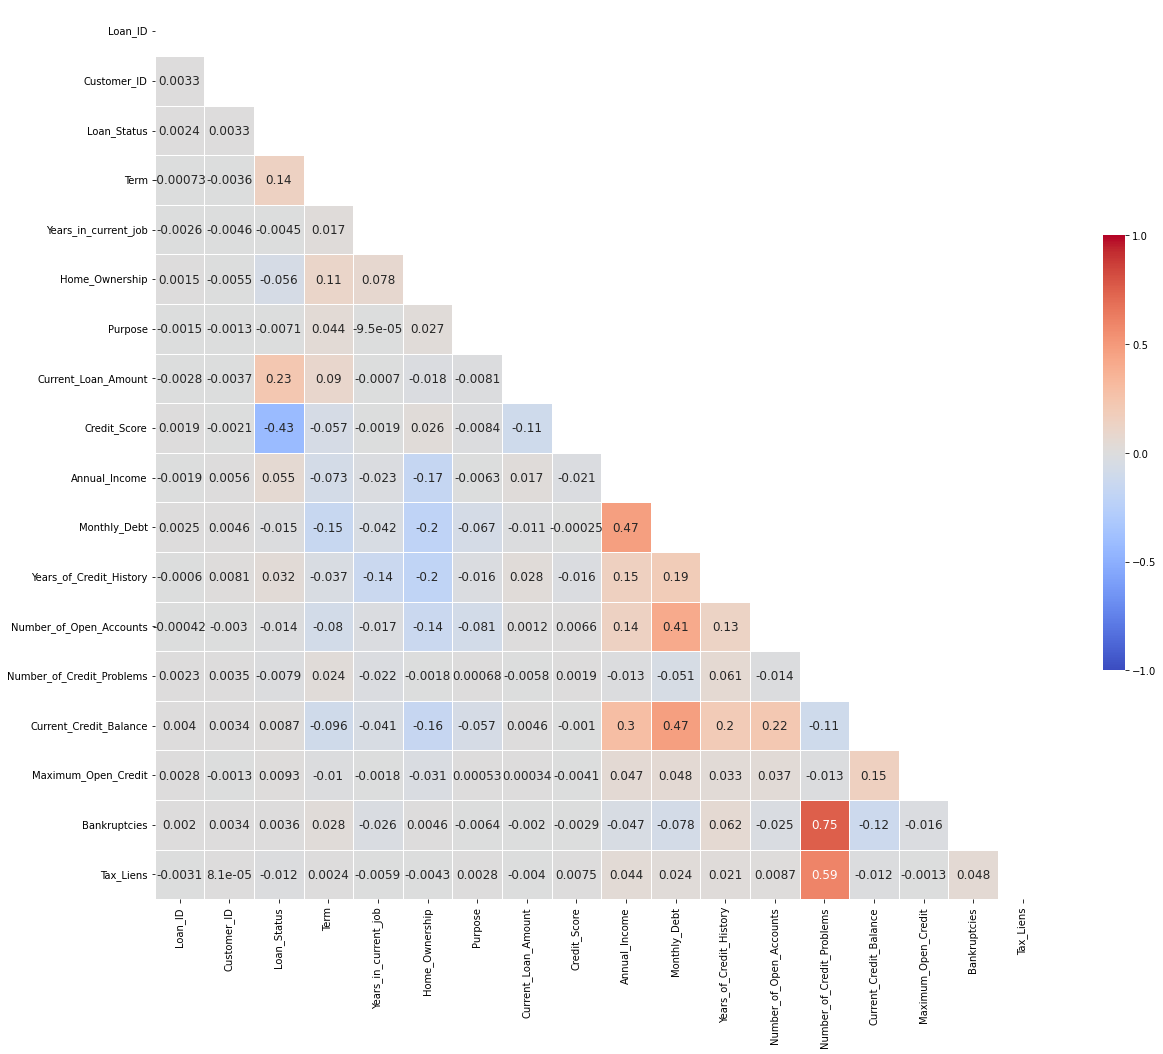

In [417]:
Corr = X.corr(method = 'pearson')
mask = np.zeros_like(Corr, dtype = np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(20,20)) 
heatmap = sns.heatmap(Corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
ax.set_yticklabels(Corr.columns, rotation = 0)
ax.set_xticklabels(Corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [418]:
y = X['Term']
X_mutual = X.drop(columns = 'Term')


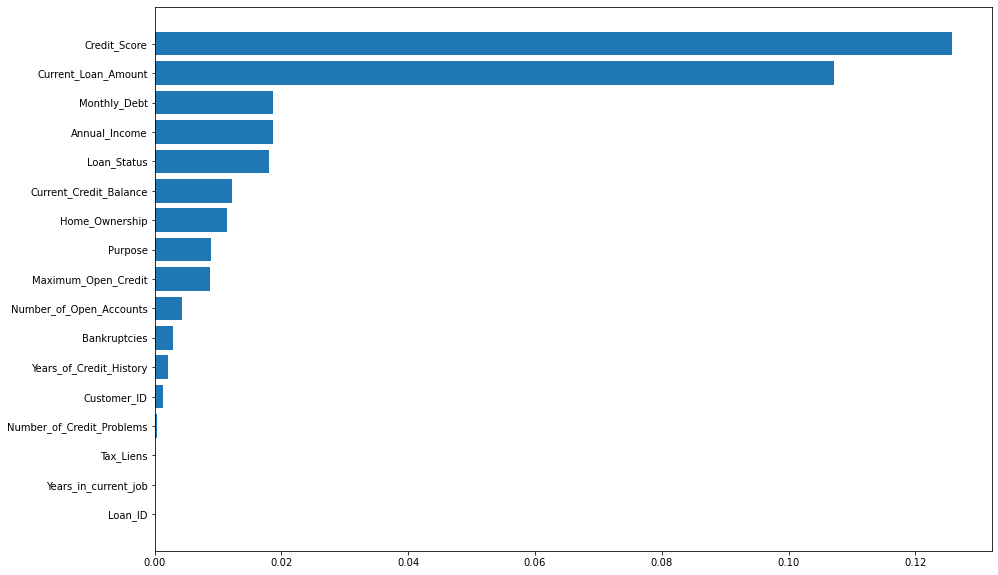

In [419]:
info = mutual_info_classif(X_mutual , y)
info = pd.Series(info, index = X_mutual.columns)
info.sort_values(ascending = True, inplace = True)
plt.figure(figsize = (15,10))
width = np.arange(len(info))
ticks = list(info.index)
plt.barh(width, info)
plt.yticks(width, ticks)
plt.show()

In [420]:
X.drop(columns = ['Bankruptcies', 'Number_of_Credit_Problems'], inplace = True)

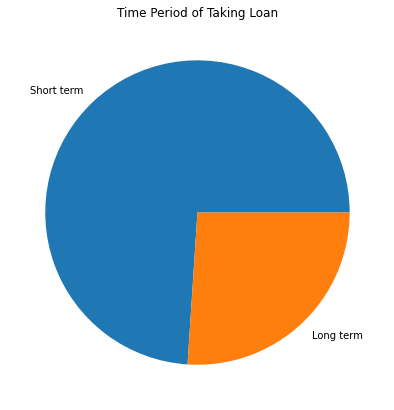

In [421]:
plt.figure(figsize=(7,7))
plt.pie(x = X['Term'].value_counts(),
        labels=['Short term','Long term'])
plt.title('Time Period of Taking Loan');

<AxesSubplot:xlabel='Purpose', ylabel='count'>

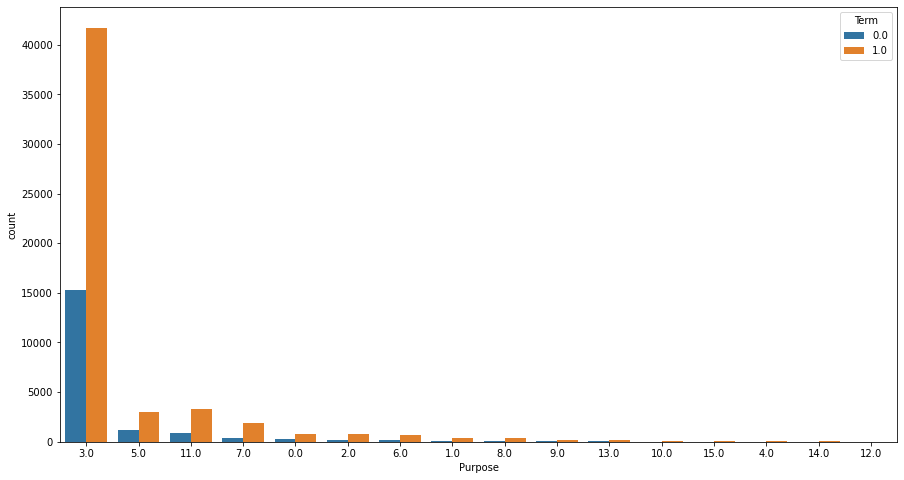

In [425]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Purpose', data = X, hue = 'Term', order = X['Purpose'].value_counts().index)

<AxesSubplot:xlabel='Term', ylabel='Credit_Score'>

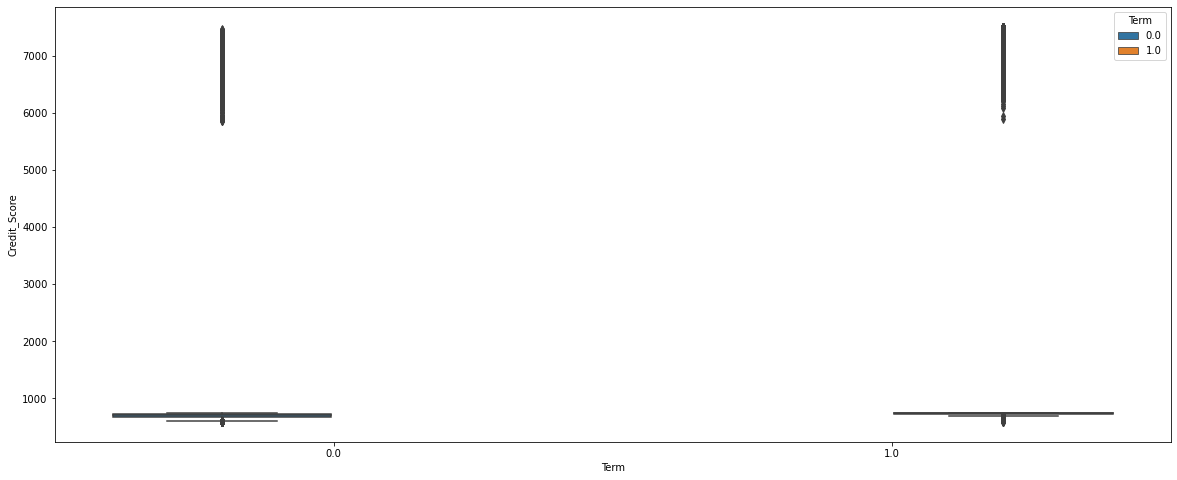

In [426]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = X, x = 'Term', y = 'Credit_Score', hue = 'Term')

Removing Outliers

<AxesSubplot:xlabel='Term', ylabel='Credit_Score'>

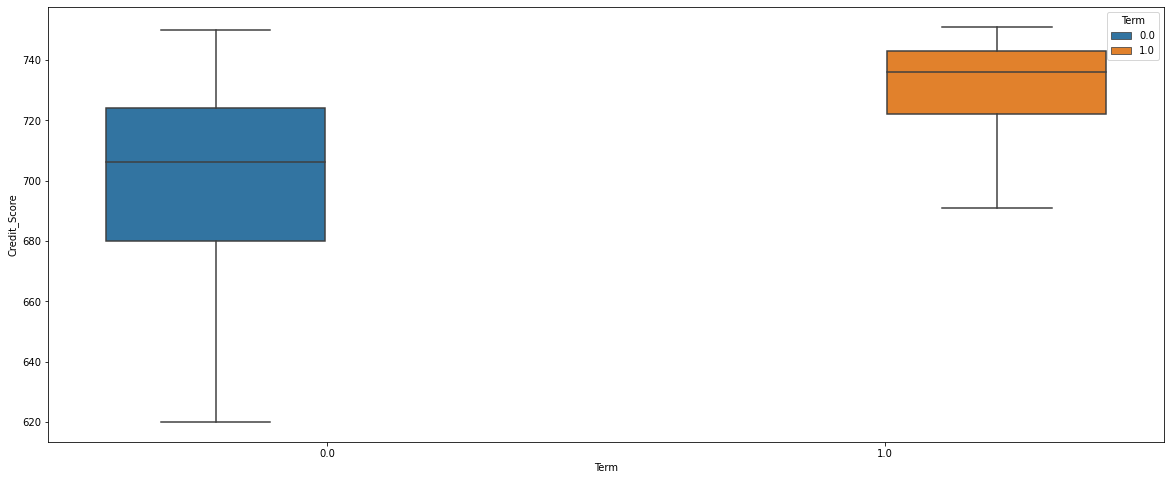

In [434]:
X.drop(index = X[(X['Credit_Score'] >= 5000)].index, inplace = True)
X.drop(index = X[(X['Credit_Score'] < 620)].index, inplace = True)
X.drop(index = X[((X['Credit_Score'] <= 690) & (X['Term'] == 1))].index, inplace = True)
    
plt.figure(figsize = (20, 8))
sns.boxplot(data = X, x = 'Term', y = 'Credit_Score', hue = 'Term')


<AxesSubplot:xlabel='Term', ylabel='Current_Loan_Amount'>

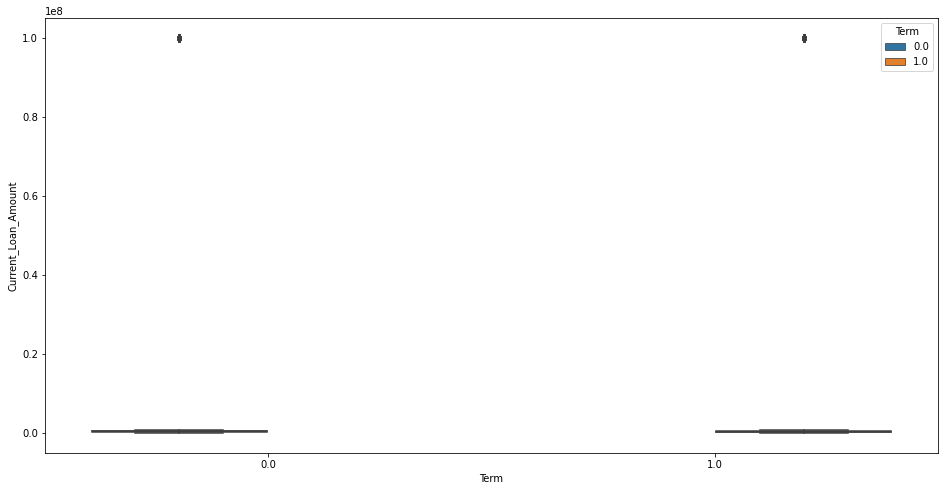

In [435]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Term', y = 'Current_Loan_Amount', data = X, hue = 'Term')

In [436]:
X[X['Current_Loan_Amount'] == 99999999]['Current_Loan_Amount'].count()

10080

<AxesSubplot:xlabel='Term', ylabel='Current_Loan_Amount'>

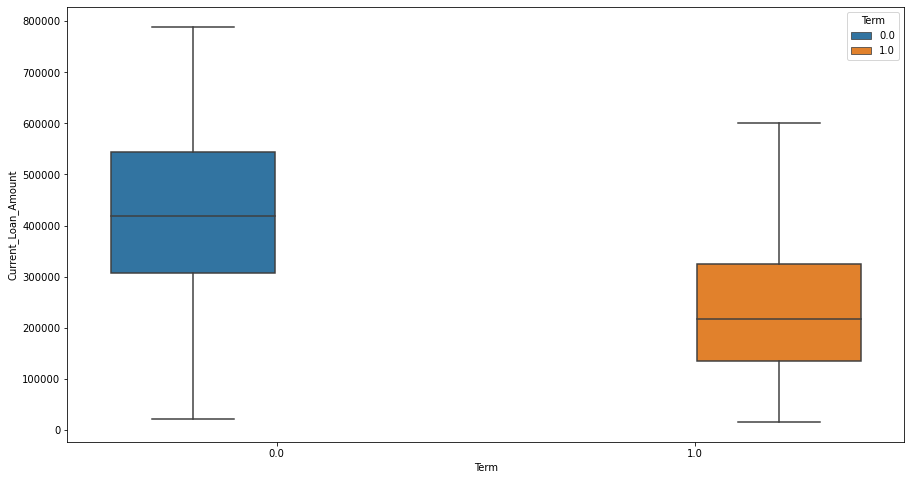

In [441]:
X = X[X['Current_Loan_Amount'] != 99999999]
X.drop(index = X[((X['Current_Loan_Amount'] > 600000) & (X['Term'] == 1))].index, inplace = True)
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'Term', y = 'Current_Loan_Amount', data = X, hue = 'Term')

<AxesSubplot:xlabel='Term', ylabel='Annual_Income'>

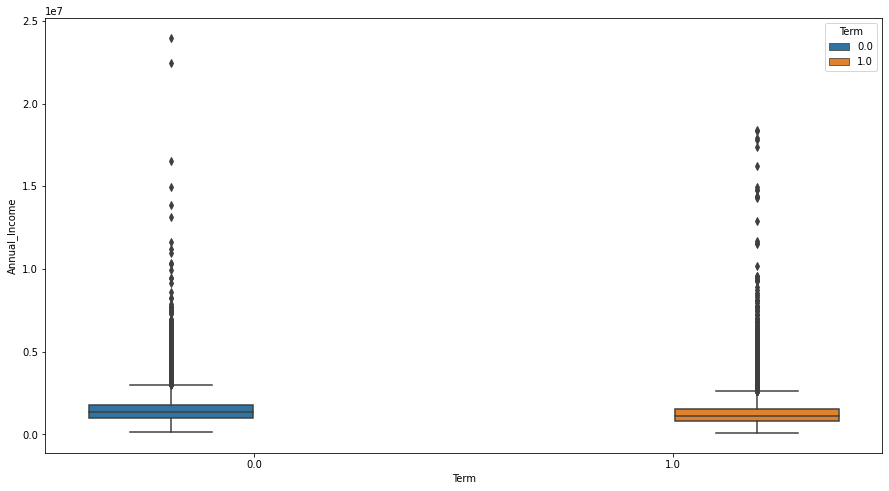

In [442]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Term', y = 'Annual_Income', data = X, hue = 'Term')

<AxesSubplot:xlabel='Term', ylabel='Annual_Income'>

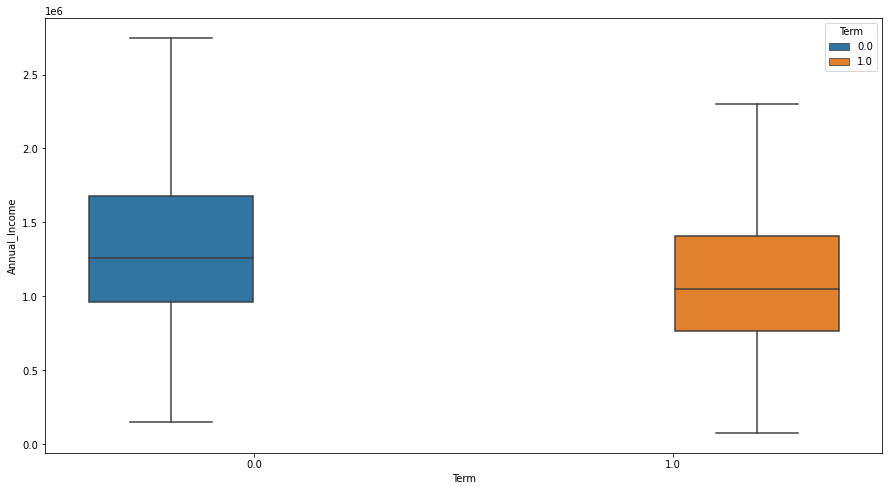

In [443]:
X.drop(index = X[X['Annual_Income'] > 2750000].index, inplace = True)
X.drop(index = X[(X['Annual_Income'] > 2300000) & (X['Term'] == 1)].index, inplace = True)
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Term', y = 'Annual_Income', data = X, hue = 'Term')

<AxesSubplot:xlabel='Term', ylabel='Monthly_Debt'>

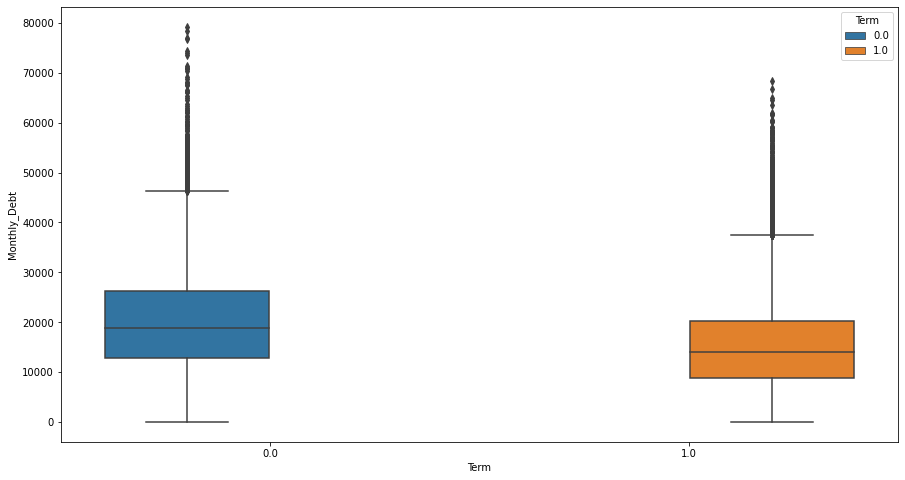

In [444]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Term', y = 'Monthly_Debt', data = X, hue = 'Term')

<AxesSubplot:xlabel='Term', ylabel='Monthly_Debt'>

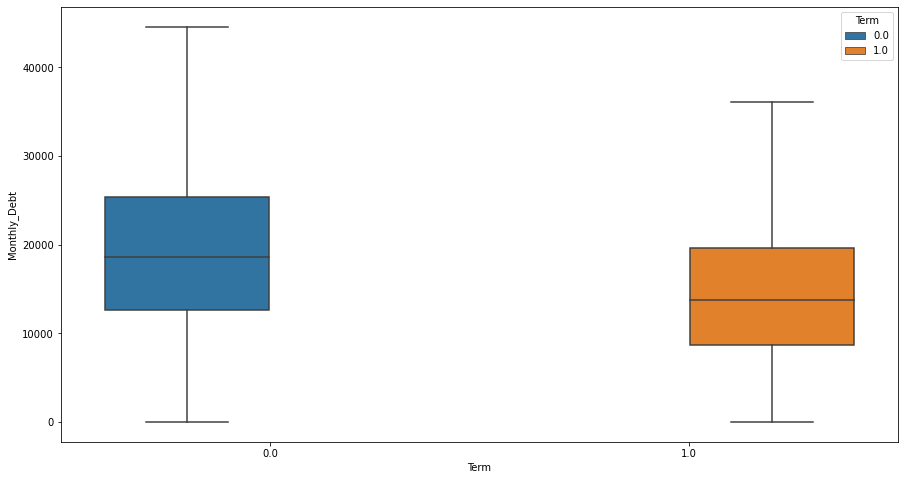

In [466]:
X.drop(index = X[X['Monthly_Debt'] > 44600].index, inplace = True)
X.drop(index = X[(X['Monthly_Debt'] > 36100) & (X['Term'] == 1)].index, inplace = True)
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Term', y = 'Monthly_Debt', data = X, hue = 'Term')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

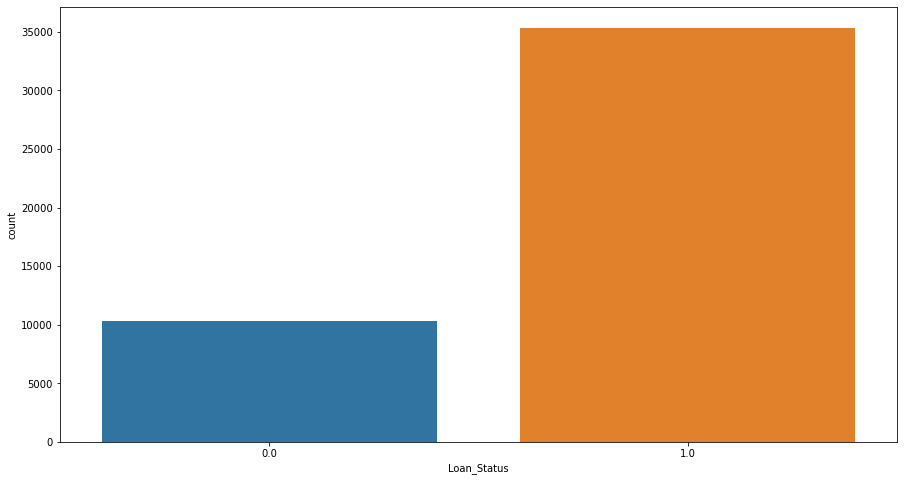

In [467]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Loan_Status', data = X)

Building the Models

In [469]:
y = X['Term']
X.drop(columns = ['Term'], inplace = True)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25)

In [474]:
Logistic = LogisticRegression(random_state = 50)
Logistic.fit(X_train, y_train)
print(mean_absolute_error(Logistic.predict(X_valid), y_valid))

0.2049015317286652


c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [475]:
r2_score(Logistic.predict(X_valid), y_valid)
accuracy_score(y_valid, Logistic.predict(X_valid))

0.7950984682713348

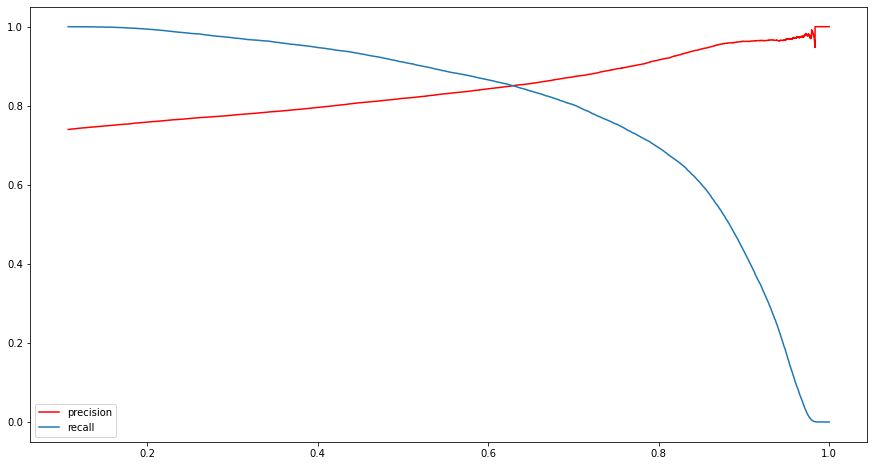

In [476]:
a, b, c = precision_recall_curve(y_train, Logistic.predict_proba(X_train)[:, 1])
plt.figure(figsize = (15, 8))
plt.plot(c, a[1:], label = 'precision', color = 'red')
plt.plot(c, b[1:], label = 'recall')
plt.legend(loc = 'lower left')

Text(0.5, 1.0, 'Confusion Mtrix')

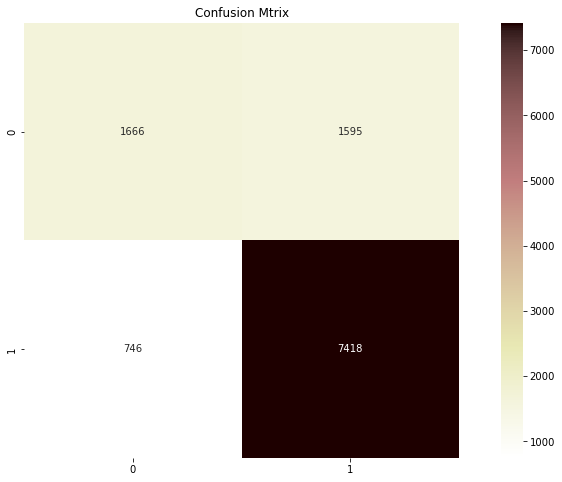

In [477]:
mat = confusion_matrix(y_valid, Logistic.predict(X_valid))
plt.figure(figsize = (15,8))
sns.heatmap(data = mat, square = True, annot = True, cmap = 'pink_r', fmt = 'd')
plt.title('Confusion Mtrix')

In [478]:
score = cross_val_score(Logistic, X = X, y = y, cv = 5)
print(score.mean())

c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.7920787746170678


c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random forest

In [479]:
Forest = RandomForestClassifier(n_estimators = 50)
fit = Forest.fit(X_train, y_train)

In [480]:
pred = Forest.predict(X_valid)
print(mean_absolute_error(y_valid, pred))
print(accuracy_score(y_valid, pred))

0.12201312910284463
0.8779868708971553


<AxesSubplot:>

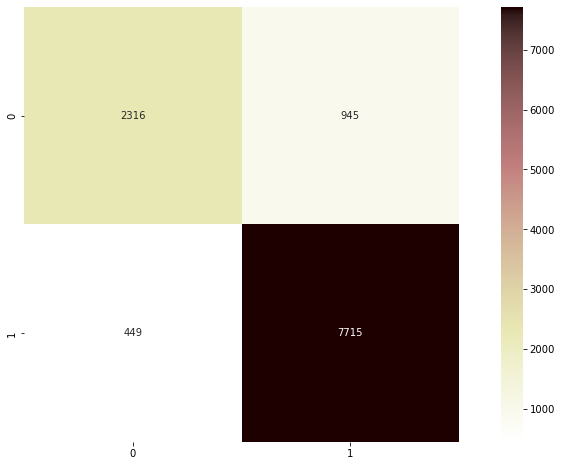

In [482]:
plt.figure(figsize = (15,8))
mat = confusion_matrix(y_valid, pred)
sns.heatmap(data = mat, cmap = 'pink_r', annot = True, square = True, fmt = 'd')

KNN

In [488]:
n = list(range(2,10))
neighbors = {'n_neighbors' : n}
KNN = KNeighborsClassifier()
Grid = GridSearchCV(KNN, param_grid = neighbors, scoring = 'f1')
Grid.fit(X_train, y_train)
print('the best hyperparameter', Grid.best_estimator_)
print('the best SCORE', Grid.best_score_)


the best hyperparameter KNeighborsClassifier(n_neighbors=9)
the best SCORE 0.8438640436536821
